# Compute spin-spin correlation function from TWORDM

In [1]:
import numpy as np

k = 36
n = 54
s = 0
groups = [[2,3,4,5,6],[7,8,9,10,11],[24,25,26,27,28],[29,30,31,32,33]]

## twordm for Fe4S4

In [2]:
import rdmutils

twordm_spatial = rdmutils.get_twordm_spatialorbital_tensor(k,'fe4s4/rdm2mps.0.0.txt')

In [3]:
np.einsum('ijji->',twordm_spatial)

2862.0

## rotate twordm to the original basis

In [4]:
import oodmrg_util

urot = oodmrg_util.loadUrot("fe4s4/urot.txt",k)

In [5]:
twordm_spatial_lmo = rdmutils.twordm_backtransform(twordm_spatial,urot)

In [6]:
np.einsum('ijji->',twordm_spatial_lmo)

2862.0000000002733

## spin-spin correlation funciton

In [8]:
import spinAnalyzer

sisj = spinAnalyzer.spinAnalyzer(twordm_spatial_lmo,groups,k,n,s)


[spinAnalyzer]: k,n,s= 36 54 0
<n>= 54.000000000005166
<s2>= -7.207034968814696e-11
igroup= 0 s2exp= 6.435821308978776 seff= 2.085695517453433
igroup= 1 s2exp= 6.791067594870579 seff= 2.1535010071357763
igroup= 2 s2exp= 6.400384724992097 seff= 2.0788339855430977
igroup= 3 s2exp= 6.6280799694548005 seff= 2.1226093817903573
s2sum= 0.8633892062477155
[[ 6.43582131  4.35749833 -5.19357235 -5.30082133]
 [ 4.35749833  6.79106759 -5.36958323 -5.48062154]
 [-5.19357235 -5.36958323  6.40038472  4.29111793]
 [-5.30082133 -5.48062154  4.29111793  6.62807997]]
tr(Sz)= -7.199396634405275e-11
sz= [-1.90052418e-11 -2.02273753e-11 -1.28874689e-11 -1.35571554e-11] -6.567724142314546e-11
ne= [5.87204456 5.73142824 5.88155517 5.79668933] 23.281717303329394


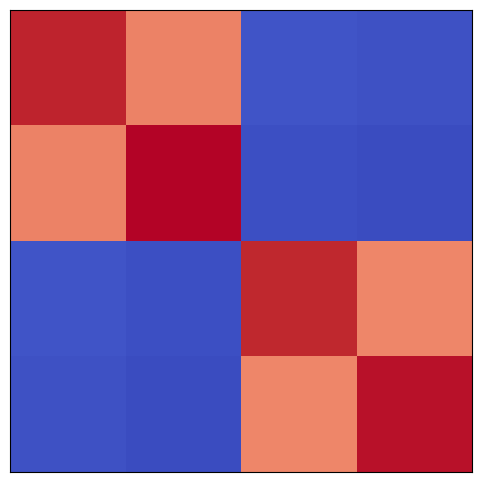

saved to fname= fe4s4/fe4s4.pdf


0

In [10]:
spinAnalyzer.genSpinSpinPlot(sisj,'fe4s4/fe4s4.pdf')

In [11]:
print(sisj)

[[ 6.43582131  4.35749833 -5.19357235 -5.30082133]
 [ 4.35749833  6.79106759 -5.36958323 -5.48062154]
 [-5.19357235 -5.36958323  6.40038472  4.29111793]
 [-5.30082133 -5.48062154  4.29111793  6.62807997]]


# Check MPS

In [1]:
import ctns_loader

ctns = ctns_loader.ctns_info()

ctns.load('fe4s4/rcanon_conf_su2_nonsu2.bin')

sites = ctns.toMPSdense()

In [2]:
import numpy as np
import mps_simple

shapes = mps_simple.shapes(sites)
print('shapes=\n',shapes)

shapes=
 [(1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 2), (2, 4, 3), (3, 4, 3), (3, 4, 4), (4, 4, 4), (4, 4, 5), (5, 4, 6), (6, 4, 6), (6, 4, 7), (7, 4, 8), (8, 4, 8), (8, 4, 9), (9, 4, 10), (10, 4, 10), (10, 4, 10), (10, 4, 9), (9, 4, 8), (8, 4, 7), (7, 4, 7), (7, 4, 6), (6, 4, 5), (5, 4, 4), (4, 4, 4), (4, 4, 4), (4, 4, 3), (3, 4, 2), (2, 4, 2), (2, 4, 1), (1, 4, 1), (1, 4, 1), (1, 4, 4), (4, 4, 1)]


In [3]:
ova = mps_simple.overlap(sites,sites)
ova

array([[1.]])

In [4]:
mps_simple.checkRCF(sites)

check i= 35  site.shape= (4, 4, 1)  |S-I|= 6.280369834735101e-16
check i= 34  site.shape= (1, 4, 4)  |S-I|= 0.0
check i= 33  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 32  site.shape= (1, 4, 1)  |S-I|= 0.0
check i= 31  site.shape= (2, 4, 1)  |S-I|= 6.280369834735101e-16
check i= 30  site.shape= (2, 4, 2)  |S-I|= 6.280369834735101e-16
check i= 29  site.shape= (3, 4, 2)  |S-I|= 3.8459253727671276e-16
check i= 28  site.shape= (4, 4, 3)  |S-I|= 3.1401849173675503e-16
check i= 27  site.shape= (4, 4, 4)  |S-I|= 3.1401849173675503e-16
check i= 26  site.shape= (4, 4, 4)  |S-I|= 3.1401849173675503e-16
check i= 25  site.shape= (5, 4, 4)  |S-I|= 6.661338147750939e-16
check i= 24  site.shape= (6, 4, 5)  |S-I|= 5.438959822042073e-16
check i= 23  site.shape= (7, 4, 6)  |S-I|= 1.4686870114880516e-15
check i= 22  site.shape= (7, 4, 7)  |S-I|= 6.280369834735101e-16
check i= 21  site.shape= (8, 4, 7)  |S-I|= 1.3042167484290357e-15
check i= 20  site.shape= (9, 4, 8)  |S-I|= 2.4899706176923835e-15
check i

0

44.279163951695985 [0.0, 0.0, 0.0, -4.440892098500627e-16, 0.6931471805599452, 1.0986122886681096, 1.0986122886681096, 1.3862943611198901, 1.3862943611198904, 1.6094379124340996, 1.7917594692280538, 1.7917594692280536, 1.9459101490553121, 2.0794415416798344, 2.079441541679836, 2.1972245773362173, 2.302585092994043, 2.302585092994043, 2.3025850929940446, 2.1972245773362182, 2.0794415416798344, 1.9459101490553126, 1.9459101490553126, 1.7917594692280545, 1.6094379124340998, 1.3862943611198901, 1.3862943611198901, 1.3862943611198901, 1.0986122886681096, 0.6931471805599454, 0.6931471805599454, 4.440892098500625e-16, 4.440892098500625e-16, 4.440892098500625e-16, 4.440892098500625e-16]


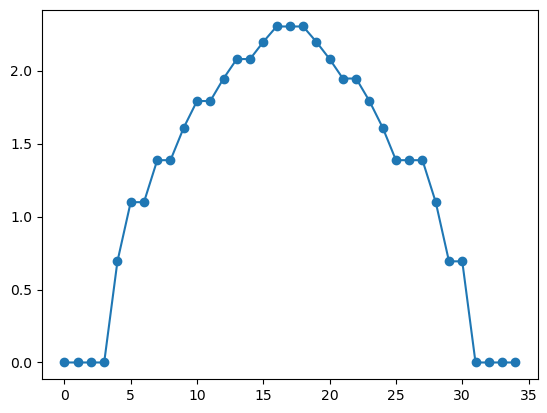

In [16]:
iroot = 0
svn = mps_simple.bipartiteEntropy(sites,iroot)
print(np.sum(svn),svn)

import matplotlib.pyplot as plt

plt.plot(svn,'o-')

In [10]:
spMPS = mps_simple.singleSiteEntropy(sites,iroot)
print('spMPS=\n',np.sum(spMPS),spMPS)

spMPS=
 12.476649250079031 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.93147181e-01  6.93147181e-01 -2.22044605e-16  6.93147181e-01
  5.55111512e-16  6.93147181e-01  6.93147181e-01  8.88178420e-16
  6.93147181e-01  6.93147181e-01  1.11022302e-15  6.93147181e-01
  6.93147181e-01  1.77635684e-15  2.10942375e-15  6.93147181e-01
  6.93147181e-01  6.93147181e-01  9.99200722e-16  6.93147181e-01
  6.93147181e-01  6.93147181e-01  1.11022302e-15  1.33226763e-15
  6.93147181e-01  6.93147181e-01  1.11022302e-15  6.93147181e-01
  6.66133815e-16  6.66133815e-16  6.66133815e-16  6.66133815e-16]


In [12]:
spqMPS = mps_simple.twoSiteEntropy(sites,iroot)
print('spqMPS=\n',spqMPS)

spqMPS=
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66133815e-16
  6.66133815e-16 6.66133815e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66133815e-16
  6.66133815e-16 6.66133815e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66133815e-16
  6.66133815e-16 6.66133815e-16]
 ...
 [6.66133815e-16 6.66133815e-16 6.66133815e-16 ... 0.00000000e+00
  6.66133815e-16 6.66133815e-16]
 [6.66133815e-16 6.66133815e-16 6.66133815e-16 ... 6.66133815e-16
  0.00000000e+00 6.66133815e-16]
 [6.66133815e-16 6.66133815e-16 6.66133815e-16 ... 6.66133815e-16
  6.66133815e-16 0.00000000e+00]]


In [13]:
IpqMPS = mps_simple.mutualInformation(spqMPS,spMPS)
print('IpqMPS=\n',IpqMPS)

IpqMPS=
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  6.66133815e-16 6.66133815e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66133815e-16
  0.00000000e+00 6.66133815e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.66133815e-16
  6.66133815e-16 0.00000000e+00]]


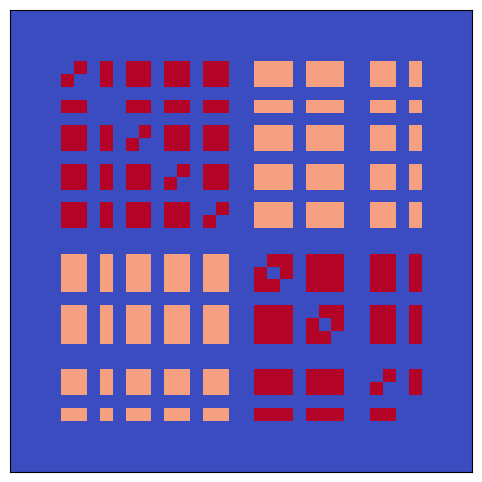

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm

ischeme = 'nearest'
fig, axes = plt.subplots(1, 1, figsize=(12, 6),
             subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.05)
clmap = cm.coolwarm
im = axes.imshow(IpqMPS,interpolation=ischeme,cmap=clmap)
plt.show()